# Notes on “Pool Testing Simulation” Article

Here is the [article](https://jamanetwork.com/journals/jamanetworkopen/fullarticle/2767513) for these notes.

# New Section

# Notations


## Parameters of the screening test

$ \begin{align}
\text{Let } p &= \text{prevalence} \\
S_e &= \text{test sensitivity} \\
S_p &= \text{test specificity} \\
\end{align} $

## **Individual patients**: Joint probability distribution of disease status and test result



Let $D = \text{event that a patient has the disease}$

Some cells in the joint distribution for a randomly selected patient can be filled in based on symbols defined above:   

|   | $D$ | $\overline{D}$ 
| :- | :-: | :-: 
| Test $+$ve | $p \cdot S_e$
| Test $-$ve |  | $(1-p) \cdot S_p$ 
| Total | $p$ | $1-p$   

A little algebra after applying the Complement Rule completes the table:  

|   | $D$ | $\overline{D}$ |
| :- | :-: | :-: |
| Test $+$ve | $p \cdot S_e$ | $ \quad (1-p) - (1-p) \cdot S_p \\ = (1-p)(1-S_p) $ |
| Test $-$ve | $ \quad p - p \cdot S_e \\ = p(1-S_e)$ | $(1-p) \cdot S_p$ |
| Total | $p$ | $1-p$ |   

## **Pools** of patients: Joint probability distribution of disease status and test result



$ \begin{align}
D_{pool} &= \text{event that a pool of } k  \text{ patient includes at least one with the disease} \\
P(D_{pool}) 
  &= 1 - P(\overline{D_{pool}}) \\
  &= 1 - P(\overline{D})^k \\
  &= 1 - (1-p)^k
\end{align} $  
<br>

We can get the joint distribution for pools of $k$ patients by substituting $p$ by $1 - (1-p)^k$  in the joint distrbution for individual patients.  

|   | $D_{pool}$ | $\overline{D_{pool}}$ 
| :- | :-: | :-: 
| Test $+$ve | $(1 - (1-p)^k) \cdot S_e$ | $ (1-p)^k \cdot (1-S_p) $ |
| Test $-$ve | $ (1 - (1-p)^k)\cdot (1-S_e)$ | $(1-p)^k \cdot S_p$ |
| Total | $1 - (1-p)^k$ | $(1-p)^k$    
<br>

$ \begin{align}
\text{In pool testing, }
P_k &= P(\text{Test +ve}) \\
    &= (1 - (1-p)^k) \cdot S_e + (1-p)^k \cdot (1-S_p)  \text{ by adding the cells in the first row}
\end{align} $  


# Simulations

In these simulations, you can adjust the prevalence of the disease and sensitivity of the test. Be sure to run Setup first.

In [1]:
#@title Run Setup
import math

# For plotting
%matplotlib notebook
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
import numpy as np


# For interaction
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# simulation parameter
Sp = 1

In [5]:
#@title Efficiency Graph
print('Slider values are in %.')

def Efficiency(prevalence = 0.5, sensitivity = 70):

    # Set up graph layout
    fig=plt.figure(2)
    ax=fig.add_axes([0,0,1,1])
    ax.set_title("Sensitivity = " + str(sensitivity)+"%")
    ax.set_xlabel('k')
    ax.set_ylabel('Efficiency')

    # Generate (k,y) values; y = Efficiency
    k = np.linspace(1, 100, num=100)
    prevalence = prevalence / 100
    sensitivity = sensitivity / 100
    y = 1/k + sensitivity*(1-(1-prevalence)**k) 
                  
    # Find k with best efficiency
    y_min = np.amin(y)
    result = np.where(y == y_min)
    k_min = result[0][0]
    print("ko =", k[k_min])

    # plot (k,y)
    plt.plot(k, y)
    plt.plot(k_min, y_min, 'bo')
    plt.ylim(0, 1)
    plt.show()

interactive_plot = interactive(Efficiency, prevalence = (0,40,0.1), sensitivity=(0,100.0,0.1))
output = interactive_plot.children[-1]
# output.layout.height = '950px'
interactive_plot



Slider values are in %.


interactive(children=(FloatSlider(value=0.5, description='prevalence', max=40.0), FloatSlider(value=70.0, desc…

# Scratch Space


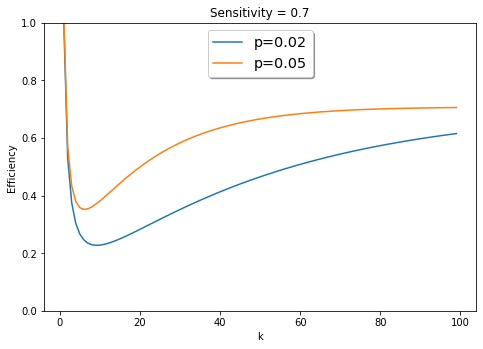

In [ ]:
# from matplotlib import pyplot as plt
# import numpy as np
# import math
# %matplotlib inline

p = 0.02
Se = 0.7
Sp = 1
x=np.arange(1, 100, 1)
y= 1/x + Se*(1-(1-p)**x)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y, label='p=0.02' )
ax.set_title("Sensitivity = " + str(Se))
ax.set_xlabel('k')
ax.set_ylabel('Efficiency')
ax.set_ylim(0,1);

p = 0.05
y= 1/x + Se*(1-(1-p)**x)
ax.plot(x,y, label = 'p=0.05');

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')